# Netflix Clustering Project  
**Team:** Saima R., Irina Samsonyan und Melis Layik 
**Course:** Data Analysis  
**Date:** November 2025

---

# 1. Introduction

Netflix stellt weltweit eine enorme Menge an Filmen und Serien bereit, die sich in Genres, 
Länge, Zielgruppen und Erscheinungsjahre unterscheiden. Durch diese Vielfalt stellt sich die Frage, 
ob sich natürliche Gruppen (Cluster) in diesem Katalog erkennen lassen, die ähnliche Titel bündeln.

Clusteranalysen können dabei helfen:

- Inhaltsmuster zu erkennen,
- Zielgruppen besser zu verstehen,
- Empfehlungen zu verbessern,
- und Trends über Jahre hinweg sichtbar zu machen.

In diesem Projekt untersuchen wir den Netflix-Katalog mithilfe von Clustering-Methoden,
um solche Muster sichtbar zu machen.

# 2. Research Question

## Problemstellung

Der Netflix-Katalog umfasst tausende Filme und Serien, deren Anzahl in bestimmten Genre- und Zielgruppenbereichen stark variiert. 
In der öffentlichen Medienwelt wird häufig diskutiert, dass Netflix einige Arten von Inhalten überproduziert 
(z. B. bestimmte Drama- oder Crime-Formate), während andere Kategorien unterrepräsentiert sind.

Es ist jedoch unklar, *welche* inhaltlichen Gruppen tatsächlich überfüllt oder vernachlässigt sind, 
da Netflix keine offiziellen Segmentierungsdaten veröffentlicht.  
Deshalb untersuchen wir mithilfe einer datengetriebenen Clusteranalyse, 
welche natürlichen Content-Gruppen der Katalog bildet und wie stark diese Cluster jeweils vertreten sind.

## Motivation

Unser Ziel ist es zu verstehen, welche Arten von Inhalten Netflix besonders stark produziert oder einkauft 
und welche Gruppen vergleichsweise klein bleiben.  
Dies liefert wertvolle Einblicke in Netflix’ Content-Strategie:

- **Überrepräsentierte Cluster** können auf Überproduktion, Trendsättigung oder strategischen Fokus hinweisen.  
- **Unterrepräsentierte Cluster** können Marktlücken darstellen, die Netflix bewusst ignoriert oder 
noch nicht ausreichend bedient.  

Durch das Clustering erkennen wir, welche Kombinationen aus Genres, Ratings, Dauer und Erscheinungsjahren 
Netflix am häufigsten anbietet – und welche kaum vorkommen.

## Zielsetzung

Das Ziel dieses Projekts ist es, den Netflix-Katalog in bedeutungsvolle Cluster zu unterteilen, 
um anschließend zu analysieren:

1. **Welche Cluster am größten sind** → Hinweise auf Überproduktion und Content-Fokus  
2. **Welche Cluster sehr klein sind** → mögliche Content-Lücken  
3. **Welche Genres, Altersfreigaben und Dauer-Muster diese Cluster definieren**  
4. **Wie sich Filme und Serien darin unterscheiden**  
5. **Ob bestimmte Cluster überwiegend neue oder ältere Inhalte enthalten**  

Damit wollen wir ein datengetriebenes Bild darüber gewinnen, 
welche inhaltlichen Bereiche Netflix dominiert – und wo Potenzial für neue Inhalte besteht.

## Zusammenhang mit dem Clustering-Ansatz

Clustering erlaubt es uns, die Inhalte nach ihren tatsächlichen Merkmalen zu gruppieren, 
ohne vorher Kategorien vorzugeben. Dadurch erkennen wir:

- welche Gruppen *natürlich* im Netflix-Katalog vorkommen,
- wie groß jede Gruppe ist,
- und welche thematischen Muster dominieren.

Die Cluster-Größe wird anschließend genutzt, um Überproduktion vs. Unterproduktion zu identifizieren.


# 3. Dataset Description

Das verwendete Dataset („Netflix Movies and TV Shows Dataset“) enthält Informationen zu über 8.000 
Titeln. Für jeden Titel sind unter anderem folgende Attribute enthalten:

- Typ: Movie oder TV Show  
- Erscheinungsjahr  
- Dauer (Minuten oder Staffeln)  
- Altersfreigabe  
- Genres (mehrere pro Titel möglich)  
- Regisseur und Cast (häufig unvollständig)  
- Länderangabe (teilweise fehlend)

**Wichtige Hinweise zur Datenqualität:**

- *director*, *cast* und *country* enthalten viele fehlende Werte — diese nutzen wir nicht.
- *duration*, *type*, *rating*, *listed_in* und *release_year* sind jedoch weitgehend vollständig.
- Das Dataset ist für Content-Analyse sehr gut geeignet.


# 4. Exploratory Data Analysis (EDA)

Bevor wir ein Clustering durchführen, analysieren wir den Datensatz, 
um ein grundlegendes Verständnis für seine Struktur und Verteilung zu bekommen.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/netflix_titles.csv")
df.head()

df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### 4.1 Verteilung: Movies vs TV Shows
Die Analyse zeigt, dass der Datensatz deutlich mehr Filme als Serien enthält. 
Dies könnte zu leicht unausgeglichenen Clustern führen, weshalb wir später im Clustering 
den Anteil der Typen pro Cluster betrachten.

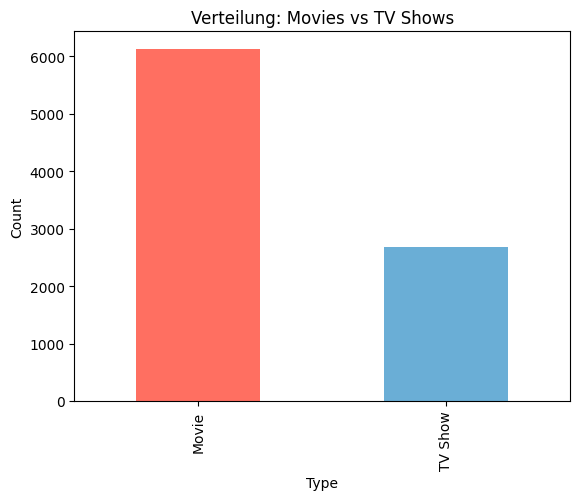

In [2]:
df['type'].value_counts().plot(kind='bar', color=['#ff6f61', '#6aaed6'])
plt.title("Verteilung: Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


Die Analyse zeigt deutlich, dass der Netflix-Katalog wesentlich mehr Movies als TV Shows enthält. 
Diese ungleiche Verteilung bedeutet, dass Filme im Clustering stärker vertreten sein werden. 
Daher ist es später wichtig zu beobachten, ob einzelne Cluster überwiegend aus Filmen bestehen 
oder ob Serien dennoch eigene Gruppierungen bilden.




### 4.2 Release Year Distribution
Die meisten Inhalte stammen aus den Jahren 2010–2020. 
Ältere Filme (vor 2000) sind stark unterrepräsentiert. 
Das deutet auf einen modernen und aktuellen Katalog hin.

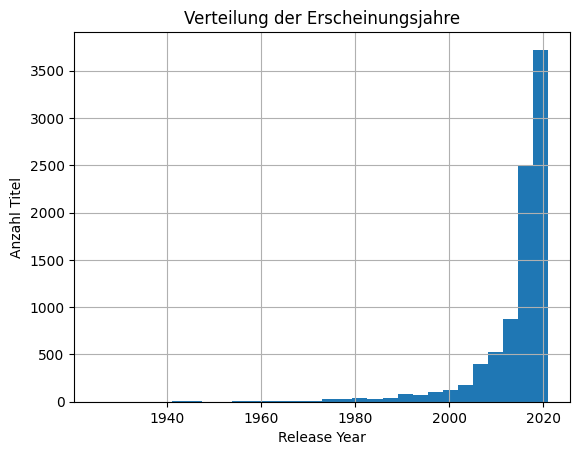

In [3]:
df['release_year'].hist(bins=30)
plt.title("Verteilung der Erscheinungsjahre")
plt.xlabel("Release Year")
plt.ylabel("Anzahl Titel")
plt.show()


### 4.3 Rating Distribution
Die am häufigsten vorkommenden Ratings sind TV-MA und TV-14. 
Netflix bietet somit überwiegend Inhalte für Erwachsene und ältere Jugendliche an.

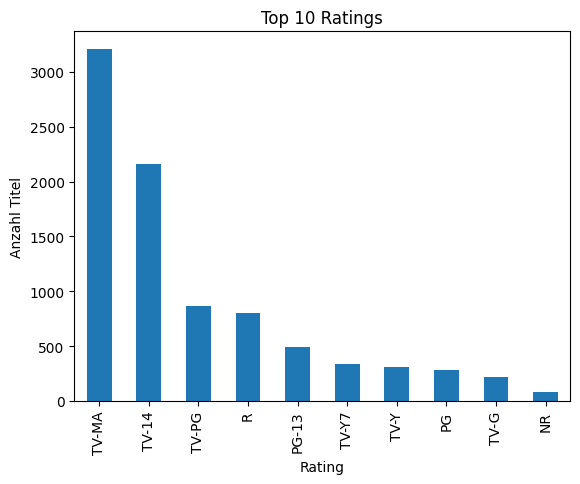

In [4]:
df['rating'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Ratings")
plt.xlabel("Rating")
plt.ylabel("Anzahl Titel")
plt.show()







### 4.4 Genre Analysis
Die häufigsten Genres im Katalog sind International Movies, Dramen und Comedy. 
Viele Titel gehören zu mehreren Genres, was für das Clustering ein Vorteil ist, 
da es vielfältige Muster abbilden kann.

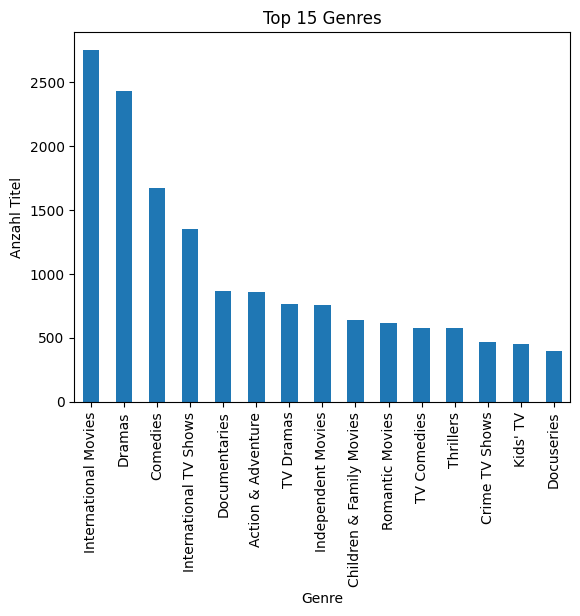

In [5]:
genre_series = df['listed_in'].dropna().str.split(', ')
all_genres = pd.Series([g for sub in genre_series for g in sub])
all_genres.value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Genres")
plt.xlabel("Genre")
plt.ylabel("Anzahl Titel")
plt.show()


### 4.5 EDA Fazit

Die EDA liefert ein klares Bild des Netflix-Katalogs: 
viele Filme, überwiegend neuere Produktionen, ein Fokus auf erwachsene Zielgruppen 
und eine starke Dominanz internationaler und dramatischer Genres. 
Diese Erkenntnisse helfen uns bei der Auswahl geeigneter Features für das Clustering.


# 5. Feature Engineering

Für das Clustering haben wir folgende Features ausgewählt und transformiert:

- **release_year** → numerisch
- **duration_num** → Minuten oder Staffelanzahl
- **rating_simplified** → vereinfacht in Family / Teens / Adults
- **type** → One-Hot-Encoding (Movie / TV Show)
- **genres** → Multi-Hot-Encoding (mehrere Genres pro Titel)

Diese Kombination bietet eine gute Balance zwischen Einfachheit und Aussagekraft.


# 6. Clustering

In diesem Abschnitt testen wir verschiedene Werte für *k* 
(Anzahl der Cluster) anhand des Silhouette Scores und wählen 
das beste Modell für die Analyse aus.

## 6.1 Scaling

## 6.2 Testing different k-values

## 6.3 Final KMeans Model

## 6.4 PCA Visualization


# 7. Cluster Interpretation

Wir interpretieren jedes Cluster anhand der wichtigsten Merkmale:

- dominierende Genres  
- durchschnittliches Release Jahr  
- typische Dauer  
- Rating-Verteilung  
- Film/Serien-Verhältnis

## Cluster 0
- Genres:
- Jahr:
- Dauer:
- Rating:
- Interpretation:

## Cluster 1
...

## Cluster 2
...

## Cluster 3
...


# 8. Conclusion

Insgesamt konnten wir zeigen, dass sich der Netflix-Katalog in mehrere sinnvolle Cluster aufteilen lässt. 
Diese Gruppen unterscheiden sich stark in ihren Genre-Schwerpunkten, Altersfreigaben und Erscheinungsjahren. 
Das Clustering zeigt, dass Netflix bestimmte Content-Trends und Zielgruppen klar bedient.

Für Streaming-Plattformen können solche Cluster wertvoll sein, 
um Empfehlungsalgorithmen zu verbessern oder Inhaltsstrategien zu optimieren.
